<a href="https://colab.research.google.com/github/Ariqueeezz/MachineLearningProject/blob/main/Experiment2_DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [21]:
# Untuk memanipulasi data
import pandas as pd
import numpy as np

# Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Oversampling
from imblearn.combine import SMOTEENN
from collections import Counter

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, ConfusionMatrixDisplay
from scipy.stats import randint, uniform

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install xgboost

In [3]:
from xgboost import XGBClassifier

# ***Data Loading***

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Kuliah-Datasets/Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv") # Load Data dari Google Drive Path

# ***EDA (Exploratory Data Analysis)***

In [5]:
data.head() # Menampilkan 5 Data paling atas

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.info() # Menampilkan seluruh info tentang dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data.describe() # Menampilak informasi statistik deskriptif dari fitur numerik pada dataset

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
diabetes = (data.loc[data['Diabetes_binary'] == 1.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100
no_diabetes = (data.loc[data['Diabetes_binary'] == 0.0]['Diabetes_binary'].count() / data['Diabetes_binary'].count()) * 100

percentage_of_target_distribution = pd.DataFrame({
    'Diabetes': f"{diabetes:.2f}%",
    'No Diabetes': f"{no_diabetes:.2f}%"
}, index=['Target'])


percentage_of_target_distribution.T

,Target
Diabetes,13.93%
No Diabetes,86.07%


In [9]:
data.groupby('Diabetes_binary')['Diabetes_binary'].count() # Cek Distribusi Kelas pada Target

,Diabetes_binary
Diabetes_binary,
0.0,218334
1.0,35346


In [10]:
data_vis = data.copy() # Menyimpan data khusus untuk visualisasi

nama_target = {
    0: 'Tidak Diabetes',
    1: 'Diabetes',
}

# Mengubah nilai Target menjadi label Asli (Diabetes dan Tidak Diabetes) untuk Visualisasi
data_vis['Diabetes_binary'] = data_vis['Diabetes_binary'].map(nama_target)
data_vis.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Tidak Diabetes,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,Tidak Diabetes,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,Tidak Diabetes,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,Tidak Diabetes,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,Tidak Diabetes,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## **Mendeteksi Class Imbalance**

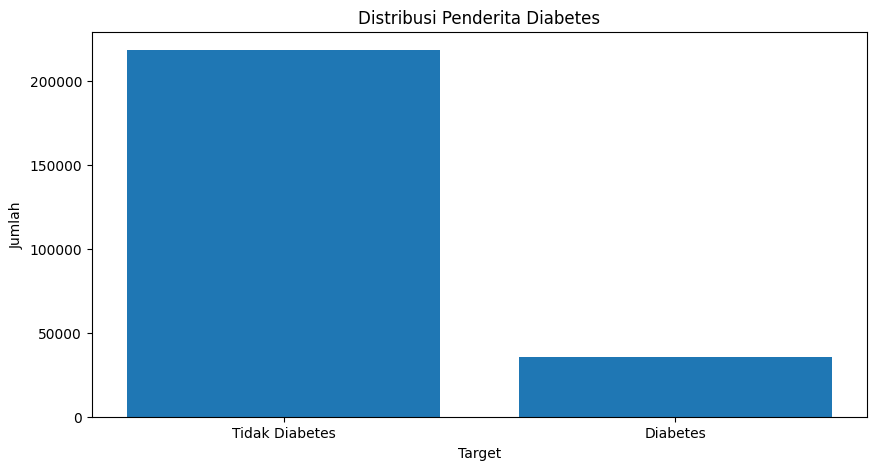

In [11]:
# Visualisasi Distribusi Penderita Diabetes (Target)
plt.figure(figsize=(10,5))
plt.bar(data_vis['Diabetes_binary'].value_counts().index, data_vis['Diabetes_binary'].value_counts())
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.title("Distribusi Penderita Diabetes")
plt.show()

## **Mengecek Fitur yang Berpengaruh terhadap Target**

Text(0.5, 0, 'Fitur')

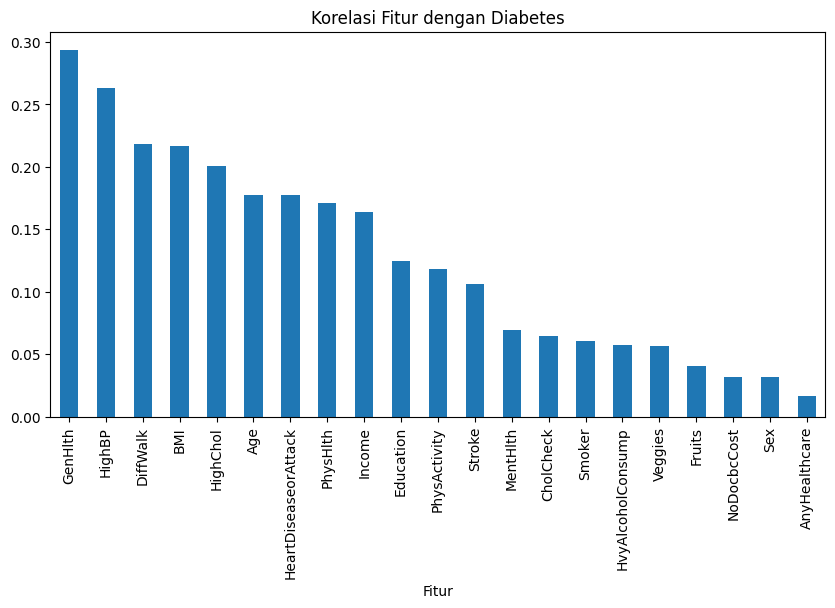

In [12]:
# Visualisasi Hubungan Fitur dengan Targetnya
target_corr = data.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
target_corr[1:].plot(kind='bar', figsize=(10,5))
plt.title("Korelasi Fitur dengan Diabetes")
plt.xlabel("Fitur")

## **Mendeteksi Multicollinearity**

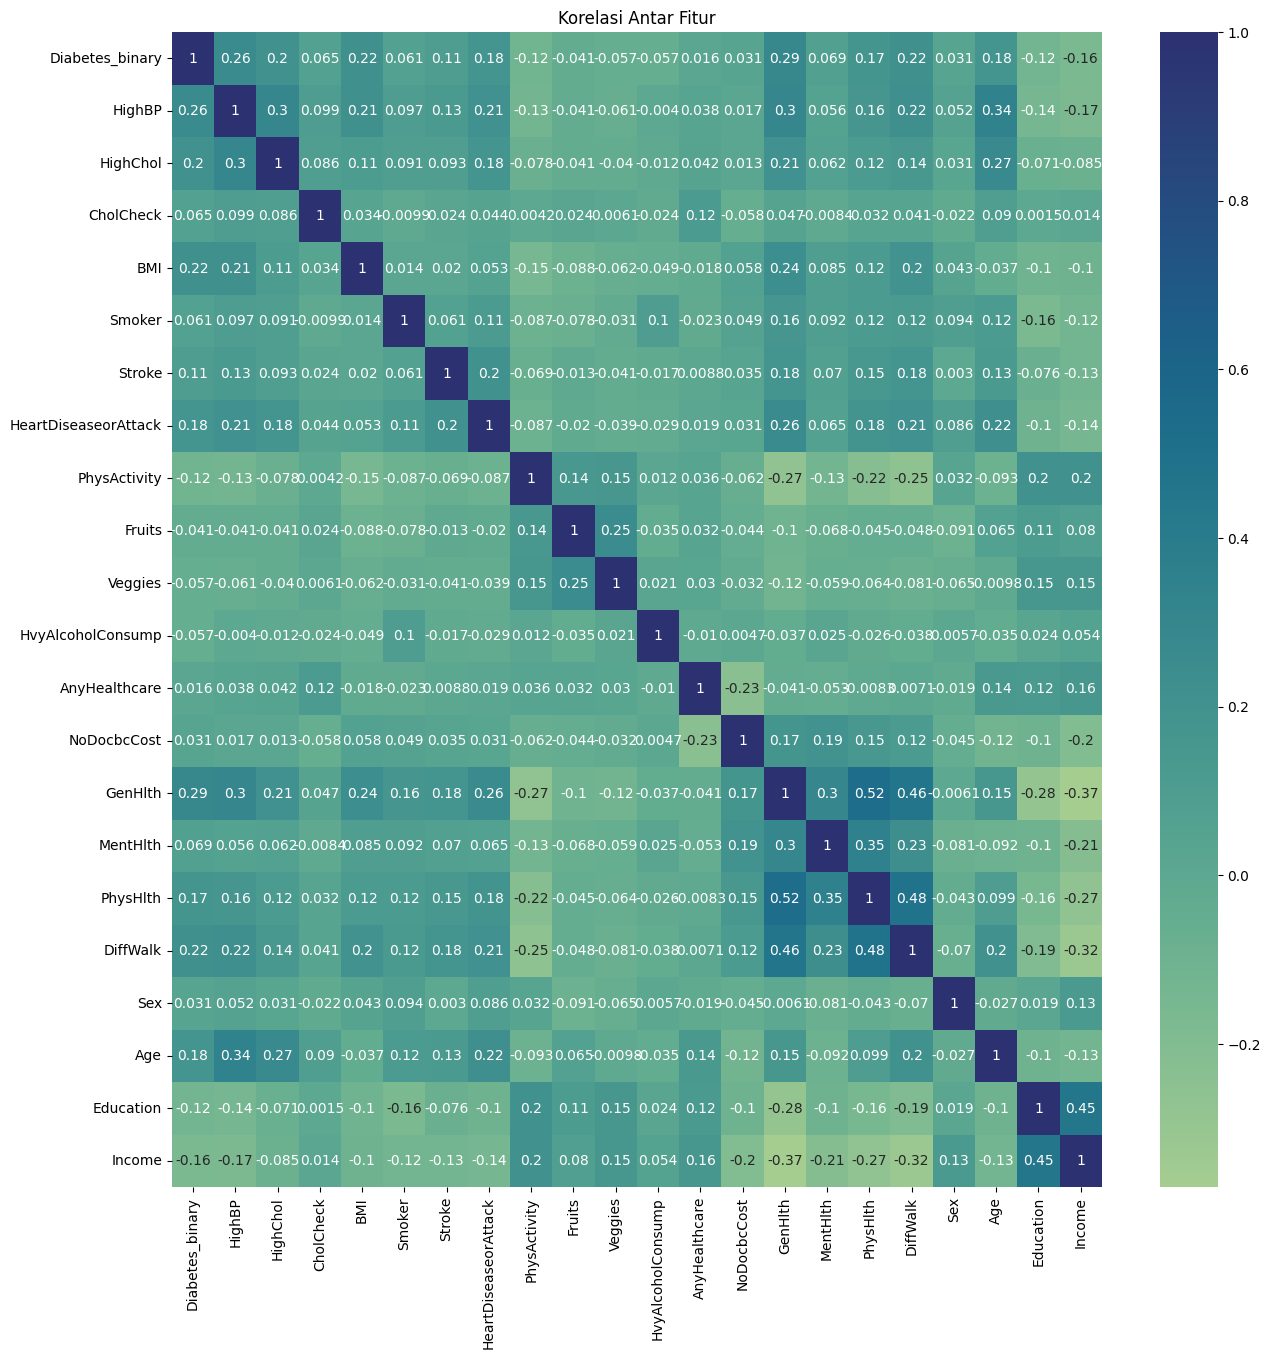

In [13]:
# Visualisasi Hubungan semua kolom
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap='crest')
plt.title("Korelasi Antar Fitur")
plt.show()

# ***Feature Scaling***

**Feature Scaling:** Penyesuaian Rentang Nilai pada Fitur-Fitur Numerik agar semua fitur dalam rentang yang seragam.

*Bagaimana jika nilai pada fitur-fitur yang kita punya tidak dalam rentang nilai yang sama?*

Misalkan ada fitur
- BMI: Skala nilai 12-98
- MentalHealth: Skala nilai 0-30
- Smoker: Biner 0 dan 1 (Ya/Tidak)

Algoritma akan mengira bahwa BMI adalah Fitur paling penting/berkontribusi karena memiliki nilai fitur yang lebih besar daripada fitur fitur lainnya padahal belum tentu fitur BMI paling penting/paling mempengaruhi nilai target. Maka ***Feature Scaling*** ini memastikan **agar semua fitur dapat berkontribusi dengan seimbang** dalam proses training model.

**Alasan memakai Normalization** (MinMaxScaler), karena nilai fitur pada dataset kebanyakan biner 0/1, maka dari itu akan lebih bagus jika menyesuaikan nilai skala fitur menjadi [0, 1].

> Skala nilai Fitur akan sangat berpengaruh pada algoritma berbasis jarak atau kemiripan antar data







In [14]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Diabetes_binary']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns.drop('Diabetes_binary'))

data_scaled['Diabetes_binary'] = data['Diabetes_binary']

data_scaled.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982,0.139333
std,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878,0.346294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.000000
50%,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143,0.000000
75%,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ***Hybrid Sampling***

**SMOTEENN (Syntethic Minority Over-sampling Technique & Edited Nearest Neighbors)**:

metode gabungan antara Over-Sampling (SMOTE) dengan Under-Sampling (ENN). Metode ini memastikan agar model bisa memiliki kesempatan yang seimbang dalam mempelajari kelas minoritas.

Cara kerja Metode SMOTEENN:
- Fase SMOTE (The Creator)

    Menciptakan Data Minoritas Baru diantara Data Minoritas lainnya yang berdekatan (Iterpolasi). Pemasalahannya seringkali metode ini menciptakan titik data minoritas yang sangat berdekatan dengan data mayoritas atau bahkan ada data minoritas yang nyasar di tengah tengah kerumunan data mayoritas.

- Fase ENN (The Cleaner)

    Setelah fase SMOTE sudah, ENN masuk sebagai tukang bersih bersih. ENN mengecek Data Asli maupun Buatan. Jika ada Data minoritas/mayoritas yang ada di kerumunan Data lawan nya, ENN akan menganggap itu noise dan ENN akan menghapusnya.


In [15]:
X = data_scaled.drop(columns=['Diabetes_binary'])
y = data_scaled['Diabetes_binary']

In [16]:
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

print("Jumlah kelas sebelum oversampling:", Counter(y))
print("Jumlah kelas setelah oversampling:", Counter(y_resampled))

Jumlah kelas sebelum oversampling: Counter({0.0: 218334, 1.0: 35346})
Jumlah kelas setelah oversampling: Counter({1.0: 185263, 0.0: 145088})


## **Visualisasi Setelah SMOTE dan Data Manipulation**

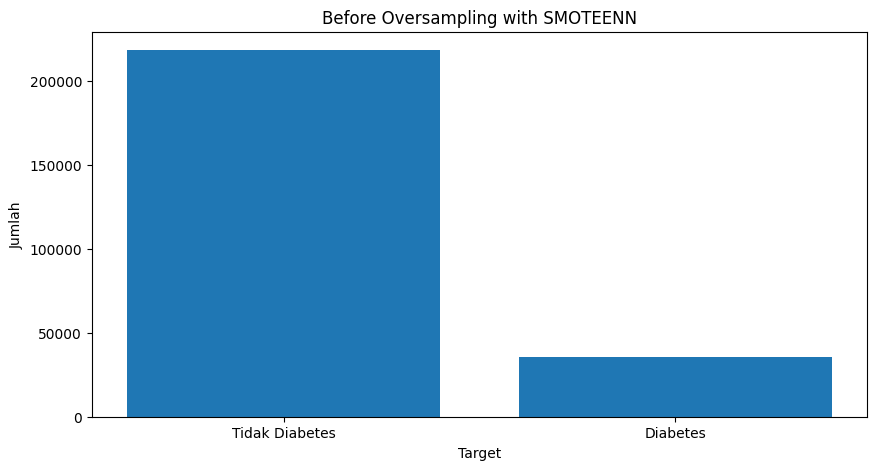

In [22]:
y_vis = y.copy()
y_vis = y.map(nama_target)

plt.figure(figsize=(10,5))
plt.bar(y_vis.value_counts().index, y_vis.value_counts())
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.title("Before Oversampling with SMOTEENN")
plt.show()

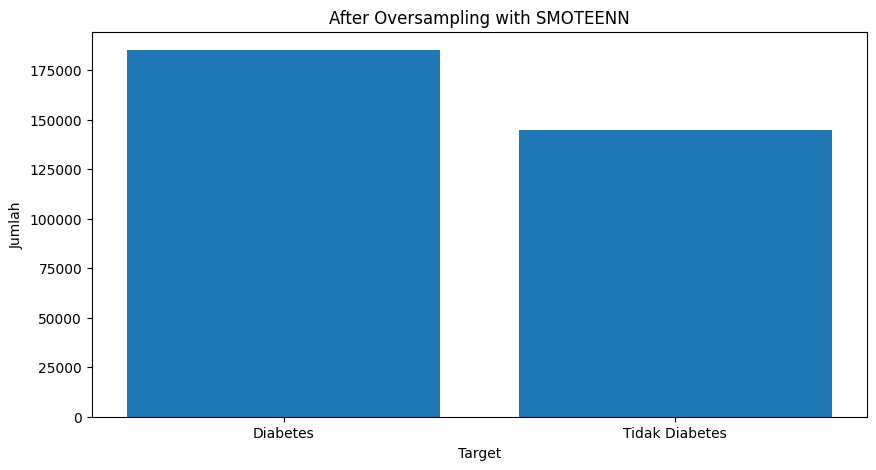

In [23]:
y_vis2 = y_resampled.copy()
y_vis2 = y_resampled.map(nama_target)

plt.figure(figsize=(10,5))
plt.bar(y_vis2.value_counts().index, y_vis2.value_counts())
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.title("After Oversampling with SMOTEENN")
plt.show()

# ***Model Selection***

In [24]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **Model Biasa**

================= Random Forest ==================


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


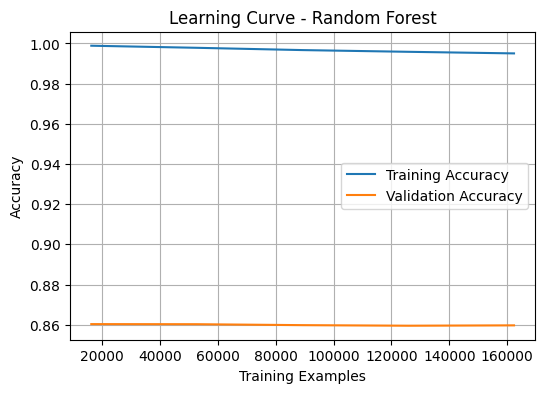

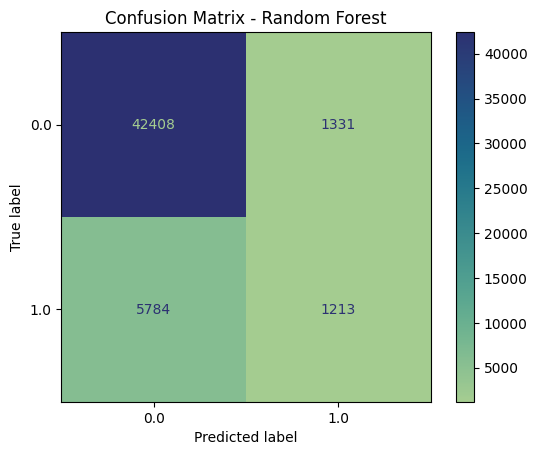

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.48      0.17      0.25      6997

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

=============== XGboost Classifier ===============


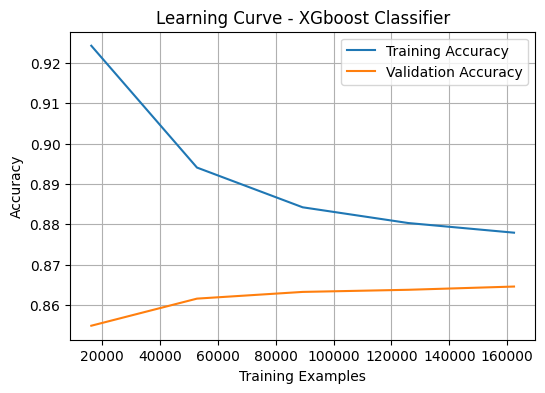

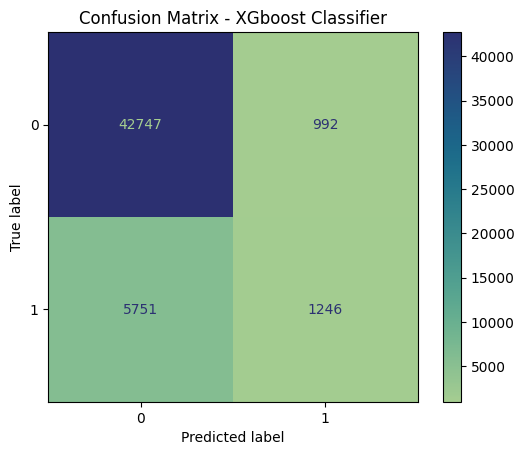

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.56      0.18      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

================= Decision Tree ==================


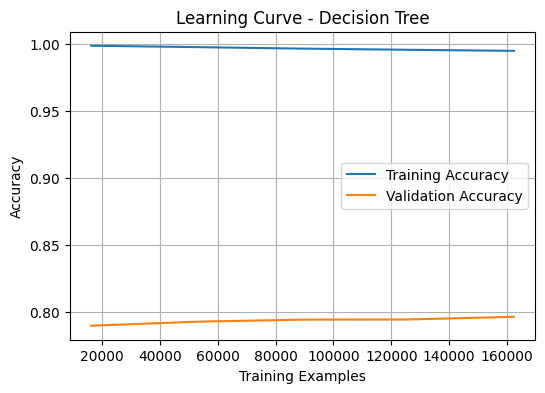

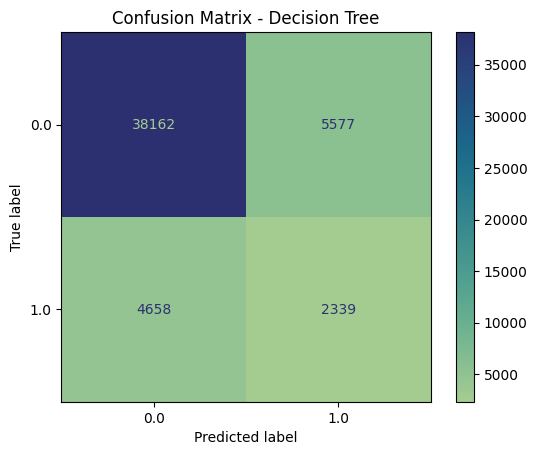

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     43739
         1.0       0.30      0.33      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736

============= Combined ROC-AUC Curve =============


/tmp/ipython-input-3925689116.py:99: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='gray', label='Random Guess')


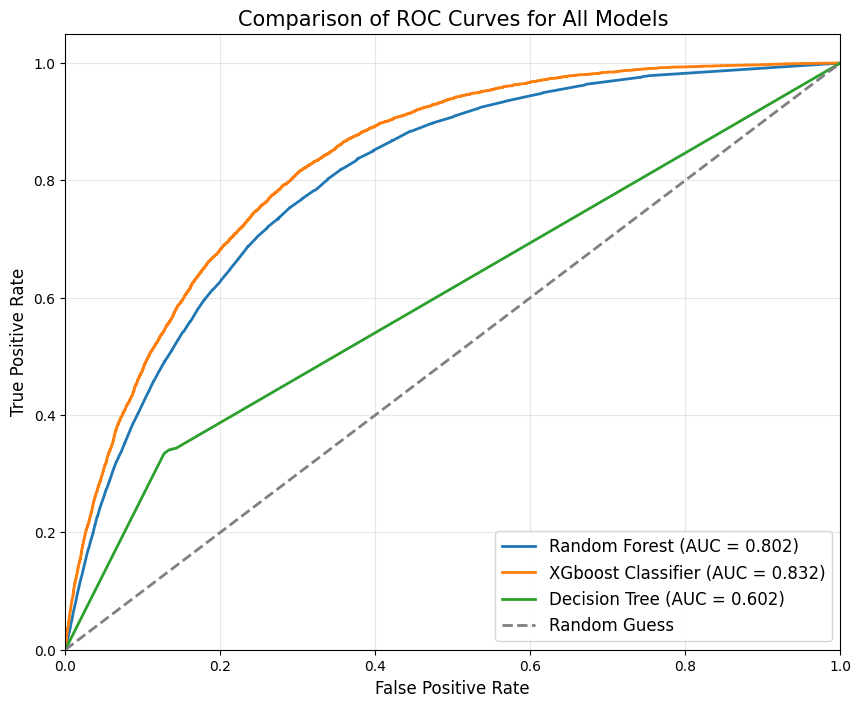

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
1,XGboost Classifier,0.867096,0.556747,0.178076,0.269843,0.831897
0,Random Forest,0.859764,0.476808,0.173360,0.254271,0.801842
2,Decision Tree,0.798269,0.295478,0.334286,0.313686,0.602269



Best Model by Accuracy: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) with accuracy 0.87


In [26]:
# Inisialisasi Model
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [
    ("Random Forest", rfc),
    ("XGboost Classifier", xgb),
    ("Decision Tree", dtc),
]

# Inisialisasi list untuk menyimpan data plotting ROC
roc_curve_data = []
model_scores = []

best_model = None
best_accuracy = 0.0

# Loop Model
for model_name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    print(f" {model_name} ".center(50, '='))

    # Training Model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluasi Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    # Simpan data ROC untuk di-plot nanti (Bagian Penting)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_curve_data.append({
        'label': model_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    })

    # --- Learning Curve (Tetap Individual per Model) ---
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy') # Sesuaikan label jika scoring='accuracy'
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Confusion Matrix (Tetap Individual per Model) ---
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    cm_display.plot(cmap='crest')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    print(classification_report(y_test, y_pred))

    # Simpan Score ke DataFrame
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': roc_auc
    })

    # Cek Best Model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# --- VISUALISASI GABUNGAN ROC CURVE ---
print(" Combined ROC-AUC Curve ".center(50, '='))
plt.figure(figsize=(10, 8))

# Loop data yang sudah disimpan untuk membuat garis tiap model
for data in roc_curve_data:
    plt.plot(data['fpr'], data['tpr'], linewidth=2,
             label=f"{data['label']} (AUC = {data['auc']:.3f})")

# Garis diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2, color='gray', label='Random Guess')

# Dekorasi Plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparison of ROC Curves for All Models', fontsize=15)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# --- Tampilkan DataFrame Hasil Akhir ---
model_scores_df = pd.DataFrame(model_scores)
display(model_scores_df.sort_values(by='AUC Score', ascending=False))

print()
print(f"Best Model by Accuracy: {best_model.steps[-1][1]} with accuracy {best_accuracy:.2f}")

## **Model + Resampling**

==== RandomForestClassifier(random_state=42) =====



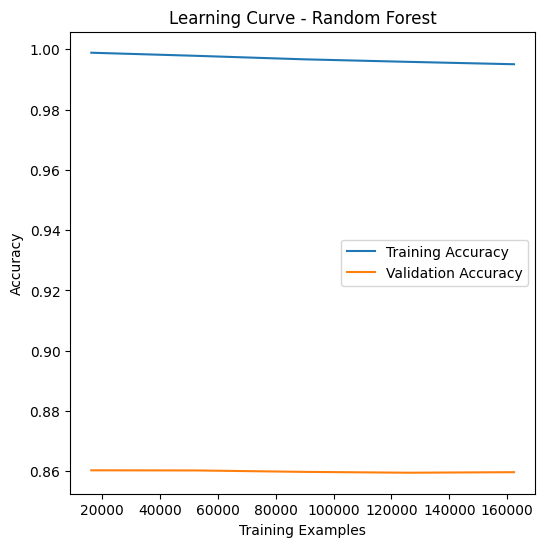

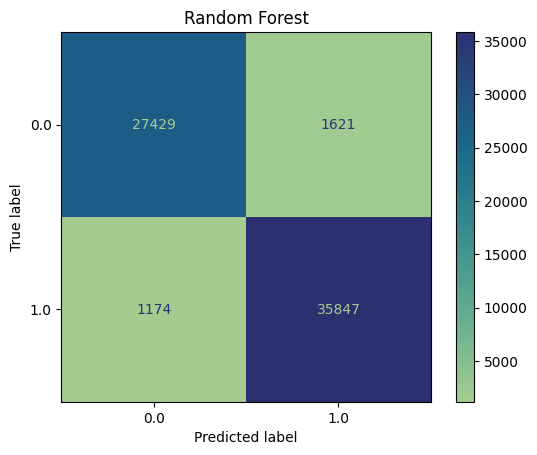


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     29050
         1.0       0.96      0.97      0.96     37021

    accuracy                           0.96     66071
   macro avg       0.96      0.96      0.96     66071
weighted avg       0.96      0.96      0.96     66071


 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi

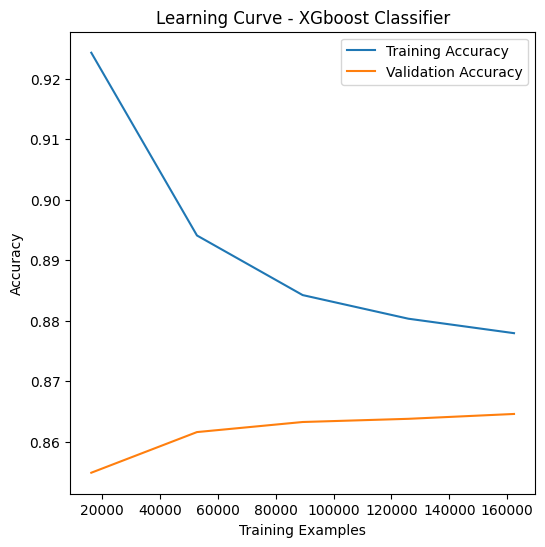

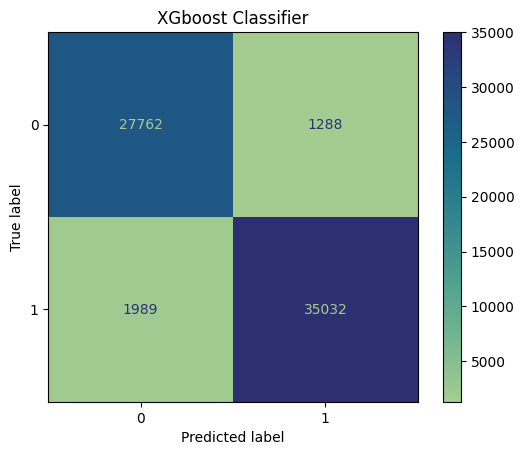


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     29050
         1.0       0.96      0.95      0.96     37021

    accuracy                           0.95     66071
   macro avg       0.95      0.95      0.95     66071
weighted avg       0.95      0.95      0.95     66071


==== DecisionTreeClassifier(random_state=42) =====



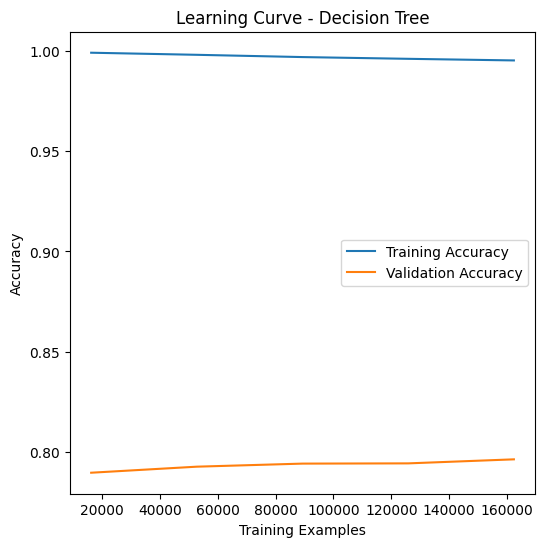

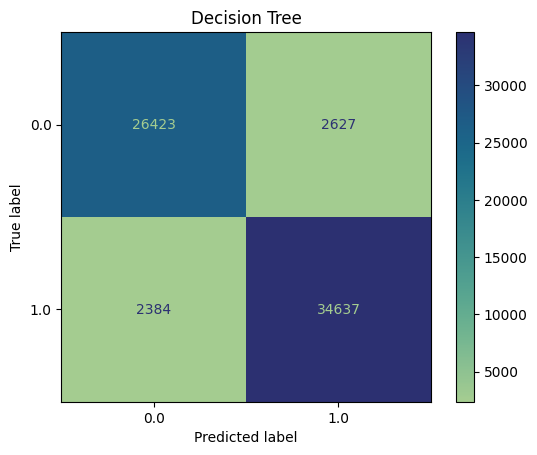


              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     29050
         1.0       0.93      0.94      0.93     37021

    accuracy                           0.92     66071
   macro avg       0.92      0.92      0.92     66071
weighted avg       0.92      0.92      0.92     66071


============= Combined ROC-AUC Curve =============


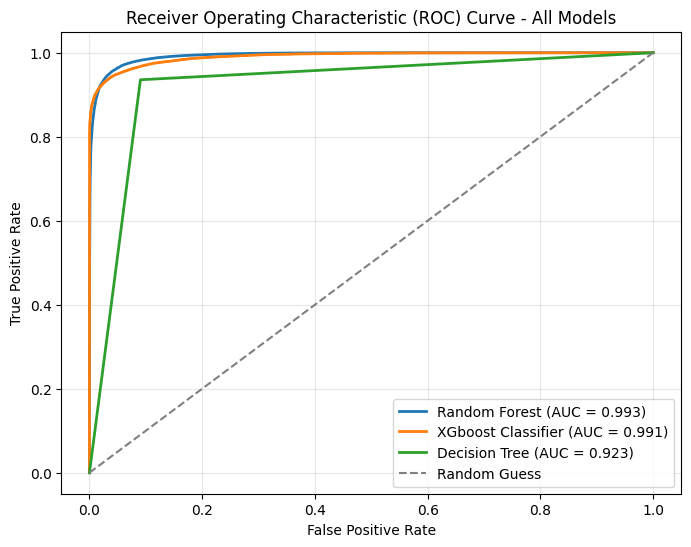

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Random Forest,0.957697,0.956736,0.968288,0.962478,0.992809
1,XGboost Classifier,0.950402,0.964537,0.946274,0.955318,0.990583
2,Decision Tree,0.924157,0.929503,0.935604,0.932544,0.922587



Best Model:
Accuracy Test: 0.957697022899608
Best Model: RandomForestClassifier(random_state=42) with accuracy 0.96


In [27]:
# Inisialisasi Model
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [
    ("Random Forest", rfc),
    ("XGboost Classifier", xgb),
    ("Decision Tree", dtc),
]

model_scores = []
roc_curve_data = [] # List baru untuk menampung data plot ROC

best_model = None
best_accuracy = 0.0
best_params = {}

for model_name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    print(f" {model} ".center(50, '='))
    print()

    # Training Model (Menggunakan data resampled sesuai code Anda)
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = pipeline.predict(X_test_resampled)
    y_prob_resampled = pipeline.predict_proba(X_test_resampled)[:, 1]

    # Evaluasi Model
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled)
    recall = recall_score(y_test_resampled, y_pred_resampled)
    f1 = f1_score(y_test_resampled, y_pred_resampled)
    cm = confusion_matrix(y_test_resampled, y_pred_resampled)
    class_report = classification_report(y_test_resampled, y_pred_resampled)
    roc_auc = roc_auc_score(y_test_resampled, y_prob_resampled)

    # --- SIMPAN DATA ROC (Jangan di-plot dulu) ---
    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_prob_resampled)
    roc_curve_data.append({
        'label': model_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    })

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Learning Curve Visualization
    plt.figure(figsize=(6, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.show()

    # Mencatat skor
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': roc_auc})

    # Confusion Matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    cm_display.plot(cmap='crest')
    plt.title(model_name)
    plt.show()
    print()
    print(class_report)
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# --- VISUALISASI GABUNGAN ROC CURVE (Di luar loop) ---
print(" Combined ROC-AUC Curve ".center(50, '='))
plt.figure(figsize=(8, 6))

for data in roc_curve_data:
    plt.plot(data['fpr'], data['tpr'], linewidth=2,
             label=f"{data['label']} (AUC = {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Evaluasi Model DataFrame
model_scores_df1 = pd.DataFrame(model_scores)
display(model_scores_df1)

print()
print(f"Best Model:")
print(f"Accuracy Test: {best_accuracy}")
# Mengambil nama class model terakhir dari pipeline
print(f"Best Model: {best_model.steps[-1][1]} with accuracy {best_accuracy:.2f}")

## **Model + GridSearchCV**

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


================= Random Forest ==================
Best Params found: {'class_weight': 'balanced_subsample', 'max_depth': None, 'n_estimators': 200}



/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


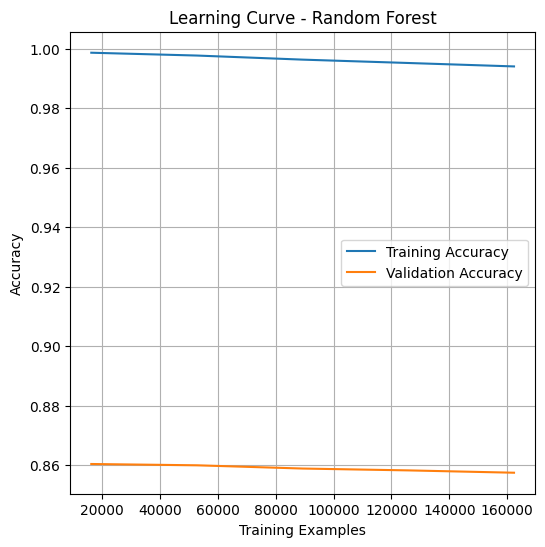

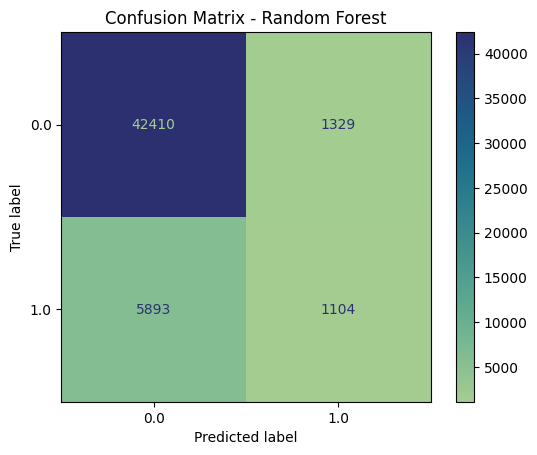


              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.45      0.16      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736




/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


=============== XGBoost Classifier ===============
Best Params found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 1}



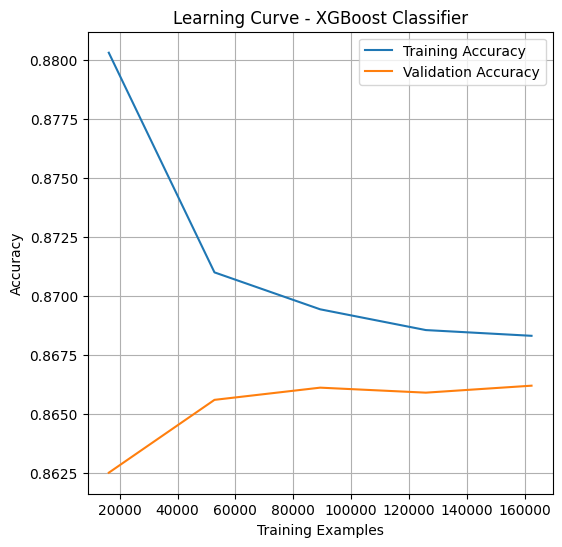

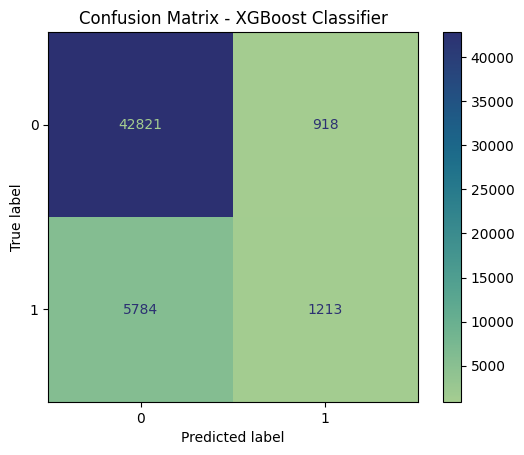


              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.57      0.17      0.27      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736


================= Decision Tree ==================
Best Params found: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2}



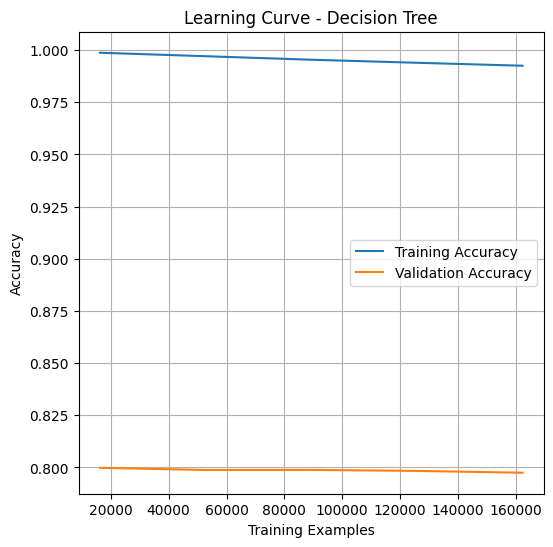

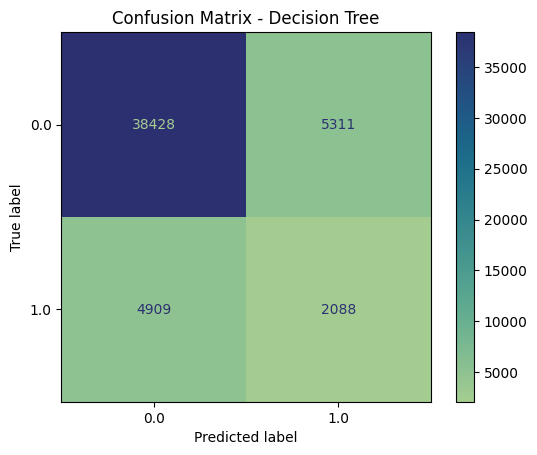


              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     43739
         1.0       0.28      0.30      0.29      6997

    accuracy                           0.80     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.80      0.80      0.80     50736


============= Combined ROC-AUC Curve =============


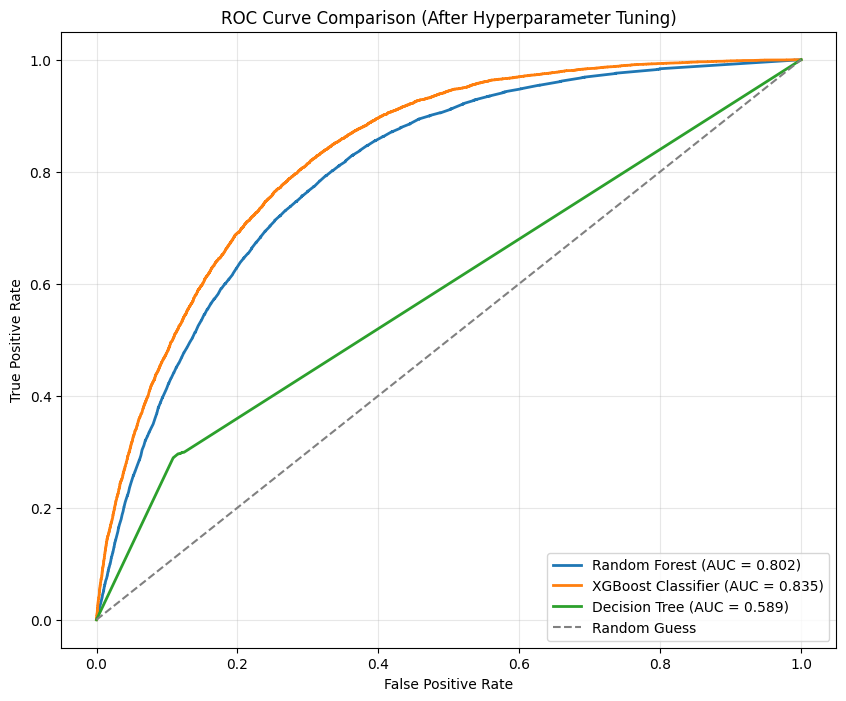

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
1,XGBoost Classifier,0.867904,0.569216,0.173360,0.265776,0.834632
0,Random Forest,0.857655,0.453761,0.157782,0.234146,0.802090
2,Decision Tree,0.798565,0.282200,0.298414,0.290081,0.589112



Best Model Overall:
Accuracy Test: 0.8679044465468306
Best Model Type: XGBClassifier
Best Parameters: 
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 1}


In [30]:
# Inisialisasi Model & Parameter
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

ratio = 86/14

models = [
  ('Random Forest', rfc,
      {
          'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20],
          'class_weight': ['balanced', 'balanced_subsample']
      }
  ),
  ('XGBoost Classifier', xgb,
      {
          'n_estimators': [50, 100, 200],
          'max_depth': [3, 10, 20],
          'scale_pos_weight': [1, ratio],
          'learning_rate': [0.01, 0.1, 0.2]
      }
  ),
  ('Decision Tree', dtc,
      {
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10],
          'class_weight': ['balanced']
      }
  ),
]

best_model = None
best_accuracy = 0.0
final_best_params = {} # Variabel baru untuk menyimpan param model pemenang
model_scores = []
roc_curve_data = [] # List untuk menyimpan data plotting ROC gabungan

for model_name, model, parameter in models:
    # --- Optimasi Hyperparameter Tuning ---
    # Kita lakukan GridSearch pada 'model' murni
    grid_search = GridSearchCV(model, param_grid=parameter, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Ambil model terbaik hasil tuning
    # Note: pipeline di sini menjadi estimator terbaik (bukan objek Pipeline scikit-learn lagi, tapi model langsung)
    pipeline = grid_search.best_estimator_
    current_params = grid_search.best_params_

    print(f" {model_name} ".center(50, '='))
    print(f"Best Params found: {current_params}")
    print()

    # Training Model (Fit ulang best estimator - opsional karena GridSearchCV refit=True by default, tapi aman)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluasi Model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # --- SIMPAN DATA ROC (Jangan di-plot dulu) ---
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_curve_data.append({
        'label': model_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    })

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Learning Curve Visualization
    plt.figure(figsize=(6, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Catat skor
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': roc_auc})

    # Confusion Matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    cm_display.plot(cmap='crest')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print()
    print(class_report)
    print()

    # Update Best Model Logic
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
        final_best_params = current_params # Simpan parameter milik model pemenang ini

# --- VISUALISASI GABUNGAN ROC CURVE ---
print(" Combined ROC-AUC Curve ".center(50, '='))
plt.figure(figsize=(10, 8))

for data in roc_curve_data:
    plt.plot(data['fpr'], data['tpr'], linewidth=2,
             label=f"{data['label']} (AUC = {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (After Hyperparameter Tuning)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Evaluasi Model DataFrame
model_scores_df2 = pd.DataFrame(model_scores)
display(model_scores_df2.sort_values(by='Accuracy', ascending=False))

print()
print(f"Best Model Overall:")
print(f"Accuracy Test: {best_accuracy}")
# Menampilkan nama class model
print(f"Best Model Type: {best_model.__class__.__name__}")
print(f"Best Parameters: \n{final_best_params}")

## **Model + Resampled + GridSearchCV**

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


================= Random Forest ==================
Best Params: {'class_weight': 'balanced_subsample', 'max_depth': None, 'n_estimators': 200}



/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


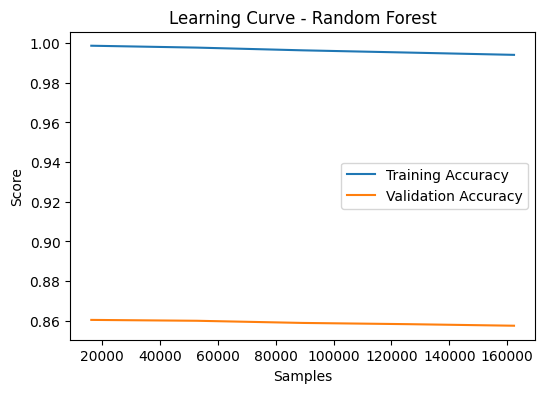

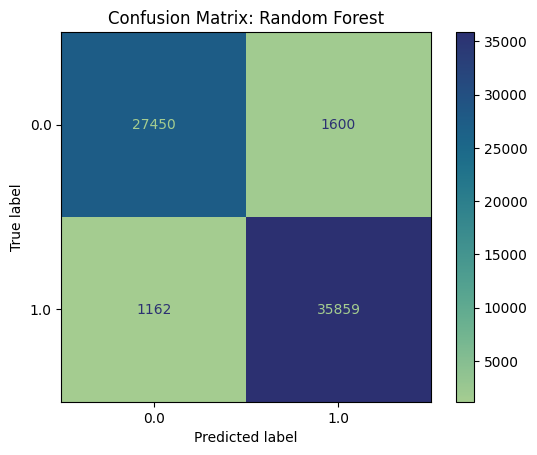

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


=============== XGBoost Classifier ===============
Best Params: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'scale_pos_weight': 1}



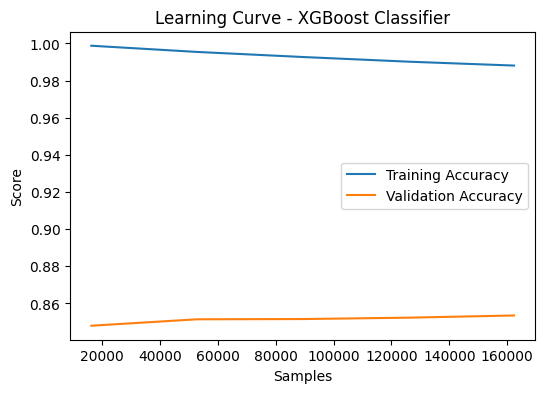

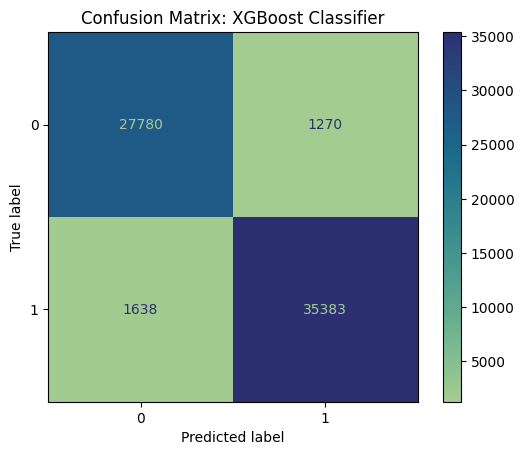

================= Decision Tree ==================
Best Params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 10}



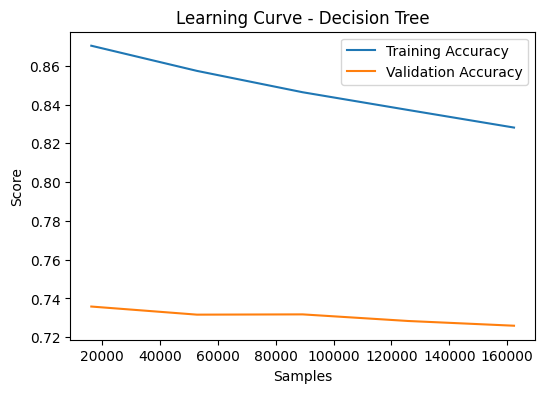

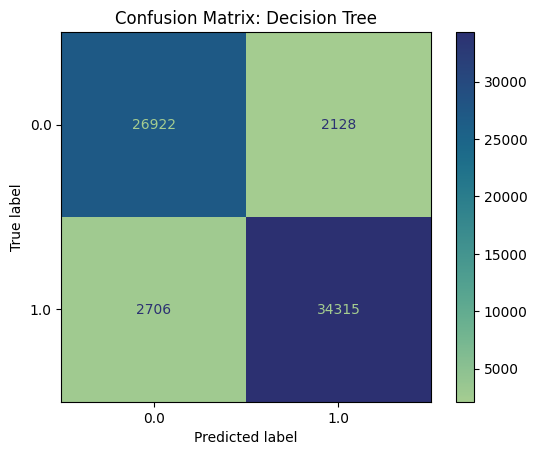

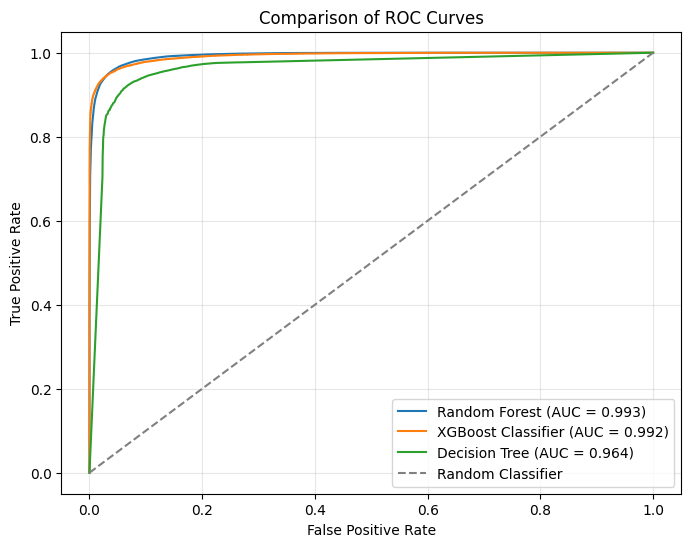

,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Random Forest,0.958196,0.957287,0.968612,0.962916,0.993097
1,XGBoost Classifier,0.955987,0.965351,0.955755,0.960529,0.992462
2,Decision Tree,0.926836,0.941607,0.926906,0.934199,0.963515



Best Model: RandomForestClassifier(class_weight='balanced_subsample', n_estimators=200,
                       random_state=42) with accuracy 0.96


In [31]:
rfc = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

ratio = 86/14
best_params = {}

models = [
  ('Random Forest', rfc,
      {
          'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20],
          'class_weight': ['balanced', 'balanced_subsample']
      }
  ),
  ('XGBoost Classifier', xgb,
      {
          'n_estimators': [50, 100, 200],
          'max_depth': [3, 10, 20], # XGBoost biasanya tidak menerima None
          'scale_pos_weight': [1, ratio], # PENTING: Memberi bobot pada kelas positif
          'learning_rate': [0.01, 0.1, 0.2] # Tambahan penting untuk XGB
      }
  ),
  ('Decision Tree', dtc,
      {
          'max_depth': [None, 10, 20],
          'min_samples_split': [2, 5, 10],
          'class_weight': ['balanced'] # PENTING
      }
  ),
]

# Inisialisasi list untuk menyimpan data ROC gabungan
all_roc_data = []

# Variabel pembantu untuk best model
best_model = None
best_accuracy = 0.0
model_scores = []

for model_name, model, parameter in models:
    # Optimasi Hyperparameter Tuning
    grid_search = GridSearchCV(model, param_grid=parameter, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    pipeline = grid_search.best_estimator_

    print(f" {model_name} ".center(50, '='))
    print(f"Best Params: {grid_search.best_params_}\n")

    # Training Model dengan data resampled
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = pipeline.predict(X_test_resampled)
    y_prob_resampled = pipeline.predict_proba(X_test_resampled)[:, 1]

    # Evaluasi Metrics
    accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
    precision = precision_score(y_test_resampled, y_pred_resampled)
    recall = recall_score(y_test_resampled, y_pred_resampled)
    f1 = f1_score(y_test_resampled, y_pred_resampled)
    roc_auc = roc_auc_score(y_test_resampled, y_prob_resampled)

    # --- SIMPAN DATA ROC UNTUK PLOT GABUNGAN ---
    fpr, tpr, _ = roc_curve(y_test_resampled, y_prob_resampled)
    all_roc_data.append({
        'name': model_name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    })

    # Learning Curve Visualization (Tetap individual)
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.xlabel('Samples')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test_resampled, y_pred_resampled)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap='crest')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    # Append scores
    model_scores.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC Score': roc_auc})

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# === VISUALISASI ROC GABUNGAN ===
plt.figure(figsize=(8, 6))
for data in all_roc_data:
    plt.plot(data['fpr'], data['tpr'], label=f"{data['name']} (AUC = {data['auc']:.3f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Hasil Akhir
model_scores_df3 = pd.DataFrame(model_scores)
display(model_scores_df3)
print(f"\nBest Model: {best_model} with accuracy {best_accuracy:.2f}")

## **Model Evaluation**

### **TUJUAN UTAMA:** PERBEDAAN HASIL MODEL SEBELUM DAN SESUDAH MENGGUNAKAN GridSearch dan SMOTEENN
Metrik Evaluasi yang digunakan:
- Accuracy Score: Proporsi Prediksi yang Benar dari seluruh data yang diprediksi.
- Precision Score: Dari semua hasil prediksi yang positif, ada berapa banyak hasil prediksi yang benar benar positif.
- Recall Score: Dari semua yang benar benar positif, ada berapa banyak prediksi yang berhasil diprediksi positif
- F1-Score: Rata-Rata Harmoni antara Precision dan Recall
- Confusion Matrix: Untuk melihat hasil prediksi (TP, TN, FP, FN)
- ROC Curve dan AUC: Untuk menilai seberapa baik model dalam membedakan mana yang benar-benar sakit dan mana yang tidak.

## **TABEL HASIL EVALUASI**

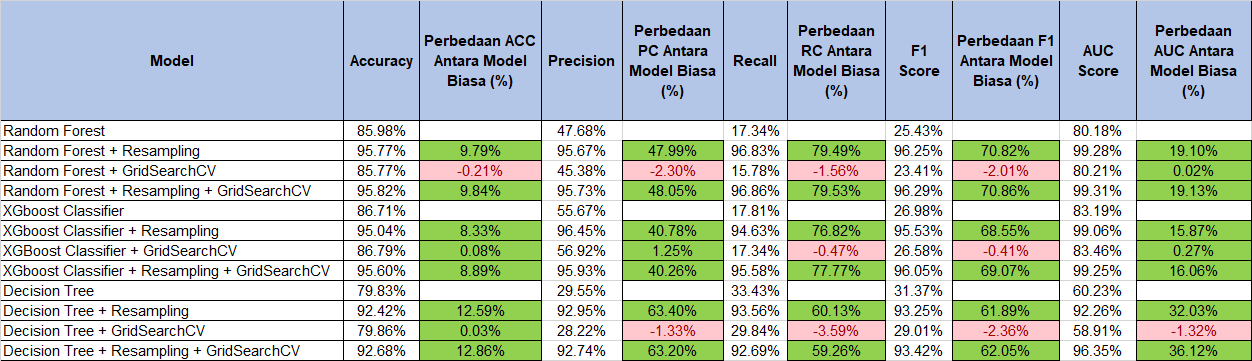

Penelitian menyimpulkan bahwa untuk dataset dengan ketimpangan kelas (imbalance), prioritas utama optimasi harus dilakukan pada tingkat data (Data Level Optimization) menggunakan teknik Resampling seperti SMOTEENN, yang terbukti meningkatkan akurasi hingga 12.5%. Optimasi tingkat algoritma (Algorithm Level Optimization) menggunakan GridSearchCV hanya efektif jika dilakukan setelah data diseimbangkan. Model Random Forest yang dikombinasikan dengan SMOTEENN dan GridSearchCV terbukti menjadi model terbaik dengan akurasi 95.82%.